<a href="https://colab.research.google.com/github/SubodhaB/Student360/blob/main/Student360%20model%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EwMvzV61z06UciAJOGcW")
project = rf.workspace("student360-dataset").project("student-behavior-detection-5bemq")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Student-Behavior-Detection-1 in yolov8:: 100%|██████████| 46/46 [00:00<00:00, 5275.28it/s]


In [ ]:
!ls

sample_data  Student-Behavior-Detection-1


In [ ]:
!ls Student-Behavior-Detection-1

data.yaml  README.dataset.txt  README.roboflow.txt  train


In [ ]:
# list the train folder recursively so we know exact layout
!ls -R /content/Student-Behavior-Detection-1/train | sed -n '1,300p'

/content/Student-Behavior-Detection-1/train:
images
labels

/content/Student-Behavior-Detection-1/train/images:
frame_120_jpg.rf.6346243baa32b5302fbf142fbf955287.jpg
frame_135_jpg.rf.c23ca49475c77aaeaf4caab6d004939f.jpg
frame_150_jpg.rf.45f514749302df3e70377d9039e99d44.jpg
frame_165_jpg.rf.68fcb5e6f4b8efb462e24624ad2dd49d.jpg
frame_180_jpg.rf.a40cea4678e49122e4bf2b559aff5d82.jpg
frame_195_jpg.rf.9b334064a819c4512fee3fda23637cc2.jpg
frame_210_jpg.rf.b9230482ecb14e0f0818ce1f9868dc3c.jpg
frame_225_jpg.rf.33df7e96cbc62749800d7ce33ba8293c.jpg
frame_240_jpg.rf.2c63886d4ad331a9ba3bc706b5406e1f.jpg
frame_255_jpg.rf.907071b0a15804269de23f5f3894b689.jpg
frame_315_jpg.rf.589eef1918c77d0fad4ffaecf4b6e0f6.jpg
frame_585_jpg.rf.1ca61a527cf04f9ee3ca94ff9f326a9b.jpg
frame_600_jpg.rf.c43433ef2dd6128cec49dd1352935e14.jpg
frame_615_jpg.rf.9e714a6c323760b1125dcfac51d3a136.jpg
frame_630_jpg.rf.e9d889023627e792296ee39ecba429b1.jpg
frame_645_jpg.rf.60da452832a93a9874ee162df02c0a83.jpg
frame_660_jpg.rf.ad63435

In [ ]:
!mkdir -p /content/Student-Behavior-Detection-1/valid/images
!mkdir -p /content/Student-Behavior-Detection-1/valid/labels
!mkdir -p /content/Student-Behavior-Detection-1/test/images
!mkdir -p /content/Student-Behavior-Detection-1/test/labels
!echo "Created valid and test folders under /content/Student-Behavior-Detection-1"

Created valid and test folders under /content/Student-Behavior-Detection-1


In [ ]:
import os, glob, shutil, random

base = "/content/Student-Behavior-Detection-1"
# detect where train images/labels are
if os.path.isdir(os.path.join(base, "train", "images")):
    train_img_dir = os.path.join(base, "train", "images")
    train_lbl_dir = os.path.join(base, "train", "labels")
else:
    train_img_dir = os.path.join(base, "train")
    train_lbl_dir = train_img_dir

valid_img_dir = os.path.join(base, "valid", "images")
valid_lbl_dir = os.path.join(base, "valid", "labels")
test_img_dir  = os.path.join(base, "test", "images")
test_lbl_dir  = os.path.join(base, "test", "labels")

imgs = sorted(glob.glob(os.path.join(train_img_dir, "*.jpg")))
random.shuffle(imgs)

n = len(imgs)
n_valid = max(1, int(n * 0.2))   # 20% to valid (at least 1)
n_test  = max(1, int(n * 0.1))   # 10% to test (at least 1)

valid_imgs = imgs[:n_valid]
test_imgs  = imgs[n_valid:n_valid+n_test]

def safe_copy(img_list, dst_img_dir, dst_lbl_dir):
    copied = 0
    for img_path in img_list:
        base_name = os.path.basename(img_path)
        label_name = os.path.splitext(base_name)[0] + ".txt"
        # copy image
        shutil.copy(img_path, os.path.join(dst_img_dir, base_name))
        # copy label if exists
        lbl_src = os.path.join(train_lbl_dir, label_name)
        if os.path.exists(lbl_src):
            shutil.copy(lbl_src, os.path.join(dst_lbl_dir, label_name))
        copied += 1
    return copied

c1 = safe_copy(valid_imgs, valid_img_dir, valid_lbl_dir)
c2 = safe_copy(test_imgs, test_img_dir, test_lbl_dir)

print(f"Copied {c1} images to valid and {c2} images to test")
print("Valid samples:", [os.path.basename(p) for p in valid_imgs])
print("Test samples:", [os.path.basename(p) for p in test_imgs])


Copied 4 images to valid and 2 images to test
Valid samples: ['frame_615_jpg.rf.9e714a6c323760b1125dcfac51d3a136.jpg', 'frame_315_jpg.rf.589eef1918c77d0fad4ffaecf4b6e0f6.jpg', 'frame_660_jpg.rf.ad63435d06c0f4f276a1672330c32679.jpg', 'frame_195_jpg.rf.9b334064a819c4512fee3fda23637cc2.jpg']
Test samples: ['frame_150_jpg.rf.45f514749302df3e70377d9039e99d44.jpg', 'frame_240_jpg.rf.2c63886d4ad331a9ba3bc706b5406e1f.jpg']


In [ ]:
import yaml
p = "/content/Student-Behavior-Detection-1/data.yaml"
with open(p,'r') as f:
    data = yaml.safe_load(f)

data['train'] = "/content/Student-Behavior-Detection-1/train/images"
data['val']   = "/content/Student-Behavior-Detection-1/valid/images"
data['test']  = "/content/Student-Behavior-Detection-1/test/images"

with open(p,'w') as f:
    yaml.dump(data, f)

print("Updated data.yaml:")
print(data)


Updated data.yaml:
{'names': ['copying'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'student-behavior-detection-5bemq', 'url': 'https://universe.roboflow.com/student360-dataset/student-behavior-detection-5bemq/dataset/1', 'version': 1, 'workspace': 'student360-dataset'}, 'test': '/content/Student-Behavior-Detection-1/test/images', 'train': '/content/Student-Behavior-Detection-1/train/images', 'val': '/content/Student-Behavior-Detection-1/valid/images'}


In [ ]:
!echo "Top-level of dataset folder:"
!ls -la /content/Student-Behavior-Detection-1

!echo "Train images (sample):"
!ls -la /content/Student-Behavior-Detection-1/train | sed -n '1,20p'

!echo "Valid images (sample):"
!ls -la /content/Student-Behavior-Detection-1/valid | sed -n '1,20p'

!echo "Test images (sample):"
!ls -la /content/Student-Behavior-Detection-1/test | sed -n '1,20p'

Top-level of dataset folder:
total 32
drwxr-xr-x 5 root root 4096 Nov 29 09:06 .
drwxr-xr-x 1 root root 4096 Nov 29 09:06 ..
-rw-r--r-- 1 root root  412 Nov 29 09:06 data.yaml
-rw-r--r-- 1 root root  181 Nov 29 09:06 README.dataset.txt
-rw-r--r-- 1 root root 1007 Nov 29 09:06 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Nov 29 09:06 test
drwxr-xr-x 4 root root 4096 Nov 29 09:06 train
drwxr-xr-x 4 root root 4096 Nov 29 09:06 valid
Train images (sample):
total 16
drwxr-xr-x 4 root root 4096 Nov 29 09:06 .
drwxr-xr-x 5 root root 4096 Nov 29 09:06 ..
drwxr-xr-x 2 root root 4096 Nov 29 09:06 images
drwxr-xr-x 2 root root 4096 Nov 29 09:06 labels
Valid images (sample):
total 16
drwxr-xr-x 4 root root 4096 Nov 29 09:06 .
drwxr-xr-x 5 root root 4096 Nov 29 09:06 ..
drwxr-xr-x 2 root root 4096 Nov 29 09:06 images
drwxr-xr-x 2 root root 4096 Nov 29 09:06 labels
Test images (sample):
total 16
drwxr-xr-x 4 root root 4096 Nov 29 09:06 .
drwxr-xr-x 5 root root 4096 Nov 29 09:06 ..
drwxr-xr-x 2 ro

In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/Student-Behavior-Detection-1/data.yaml",
    epochs=20,
    imgsz=512,
    batch=8
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Student-Behavior-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, fr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4d73ed30e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!ls /content/runs/detect/train

args.yaml			 labels.jpg	    train_batch31.jpg
BoxF1_curve.png			 results.csv	    train_batch32.jpg
BoxP_curve.png			 results.png	    val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg   val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg   weights
confusion_matrix_normalized.png  train_batch2.jpg
confusion_matrix.png		 train_batch30.jpg


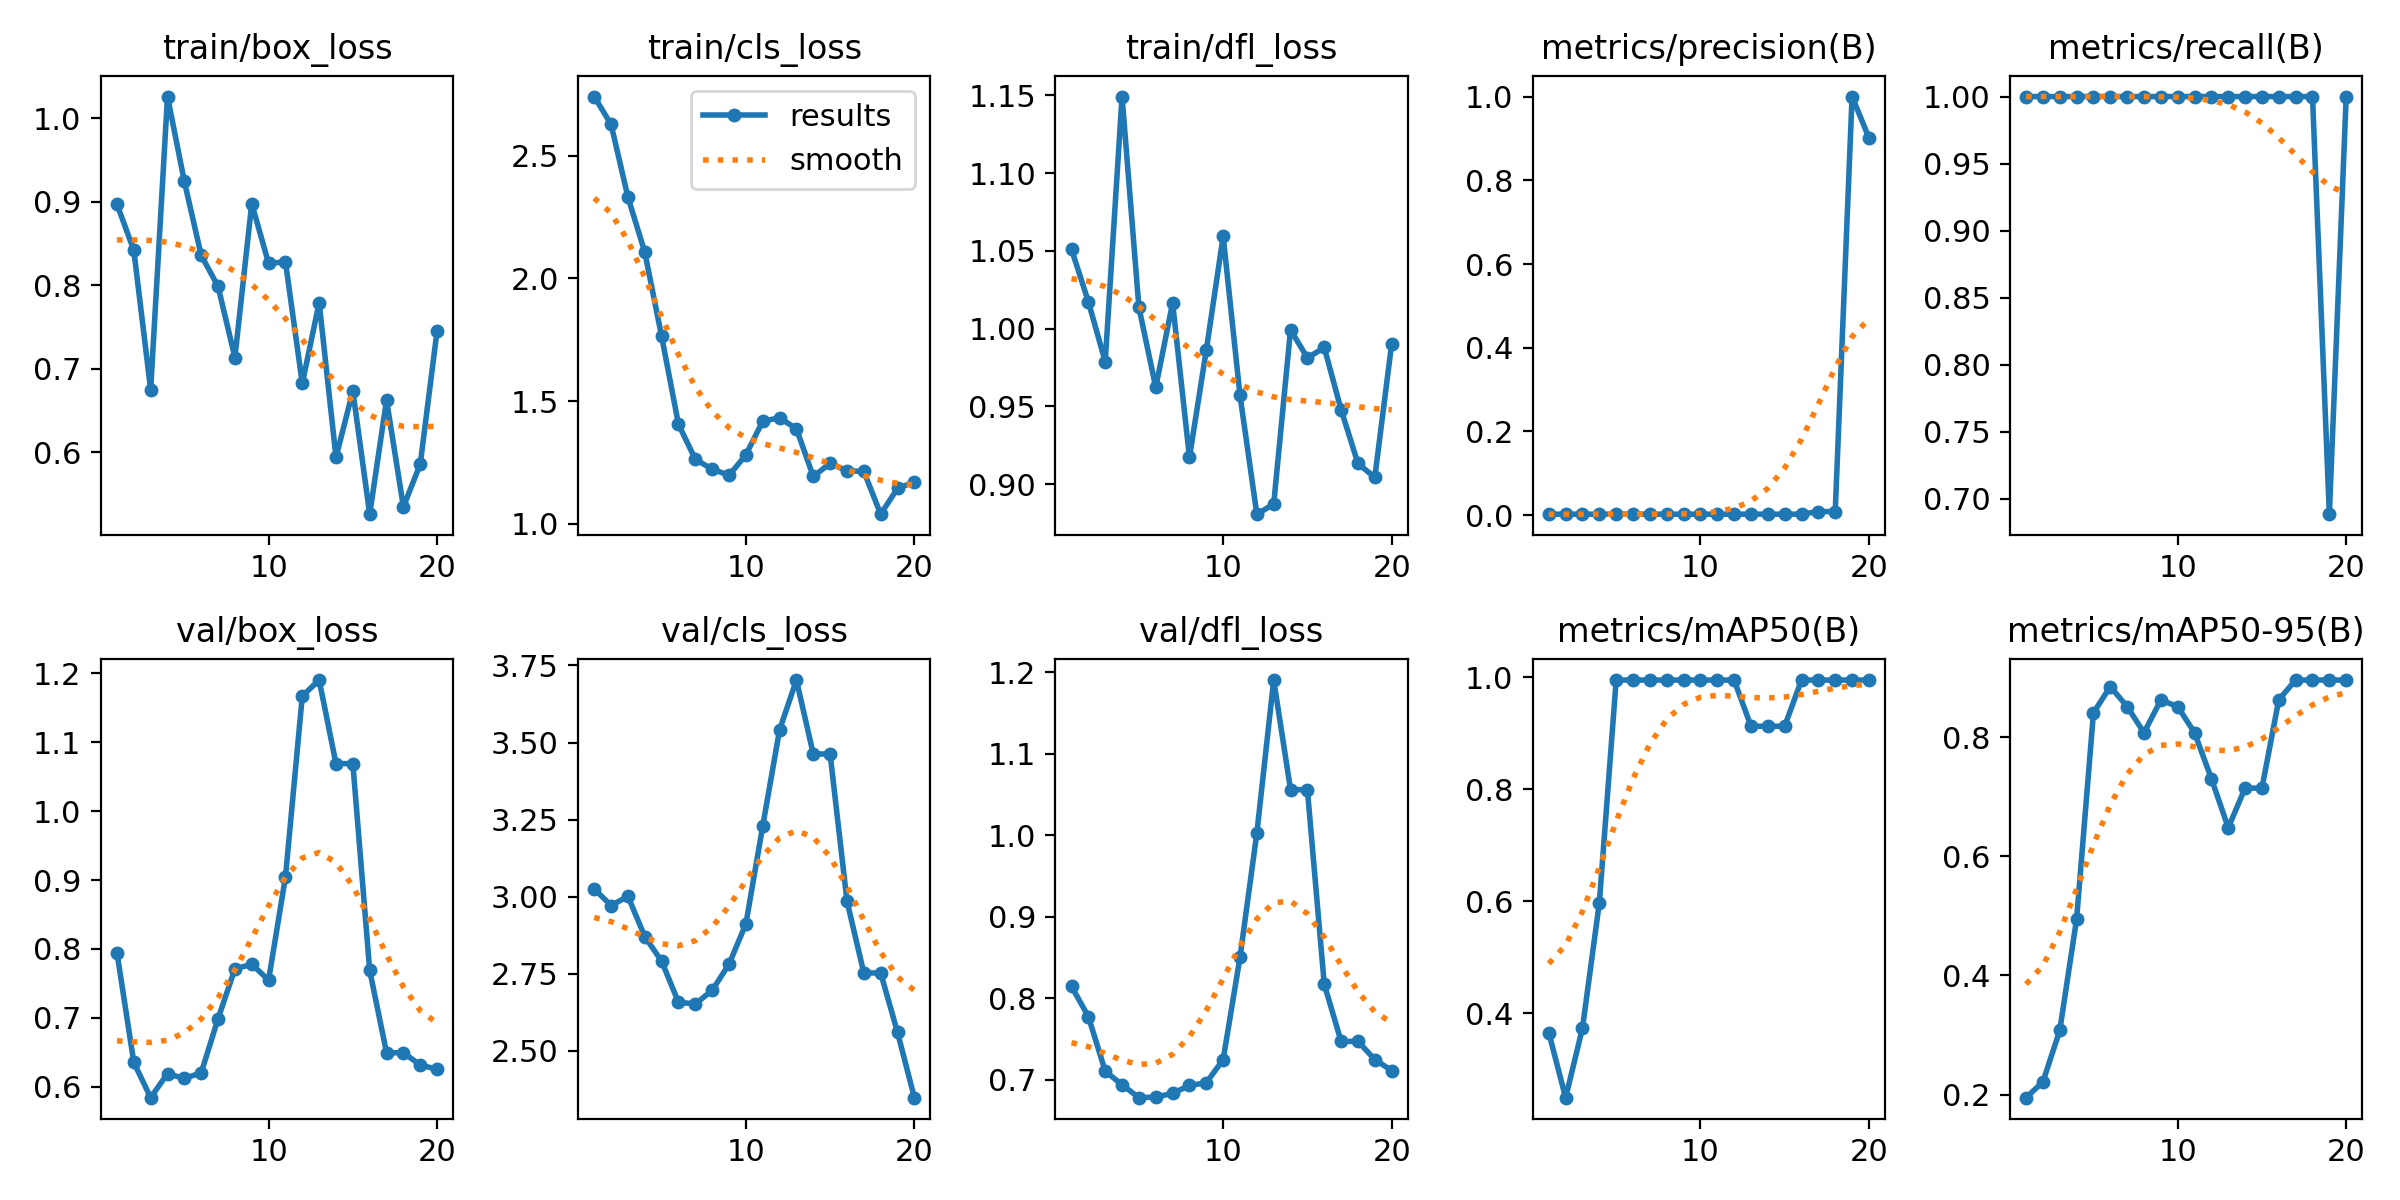

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/train/results.png')

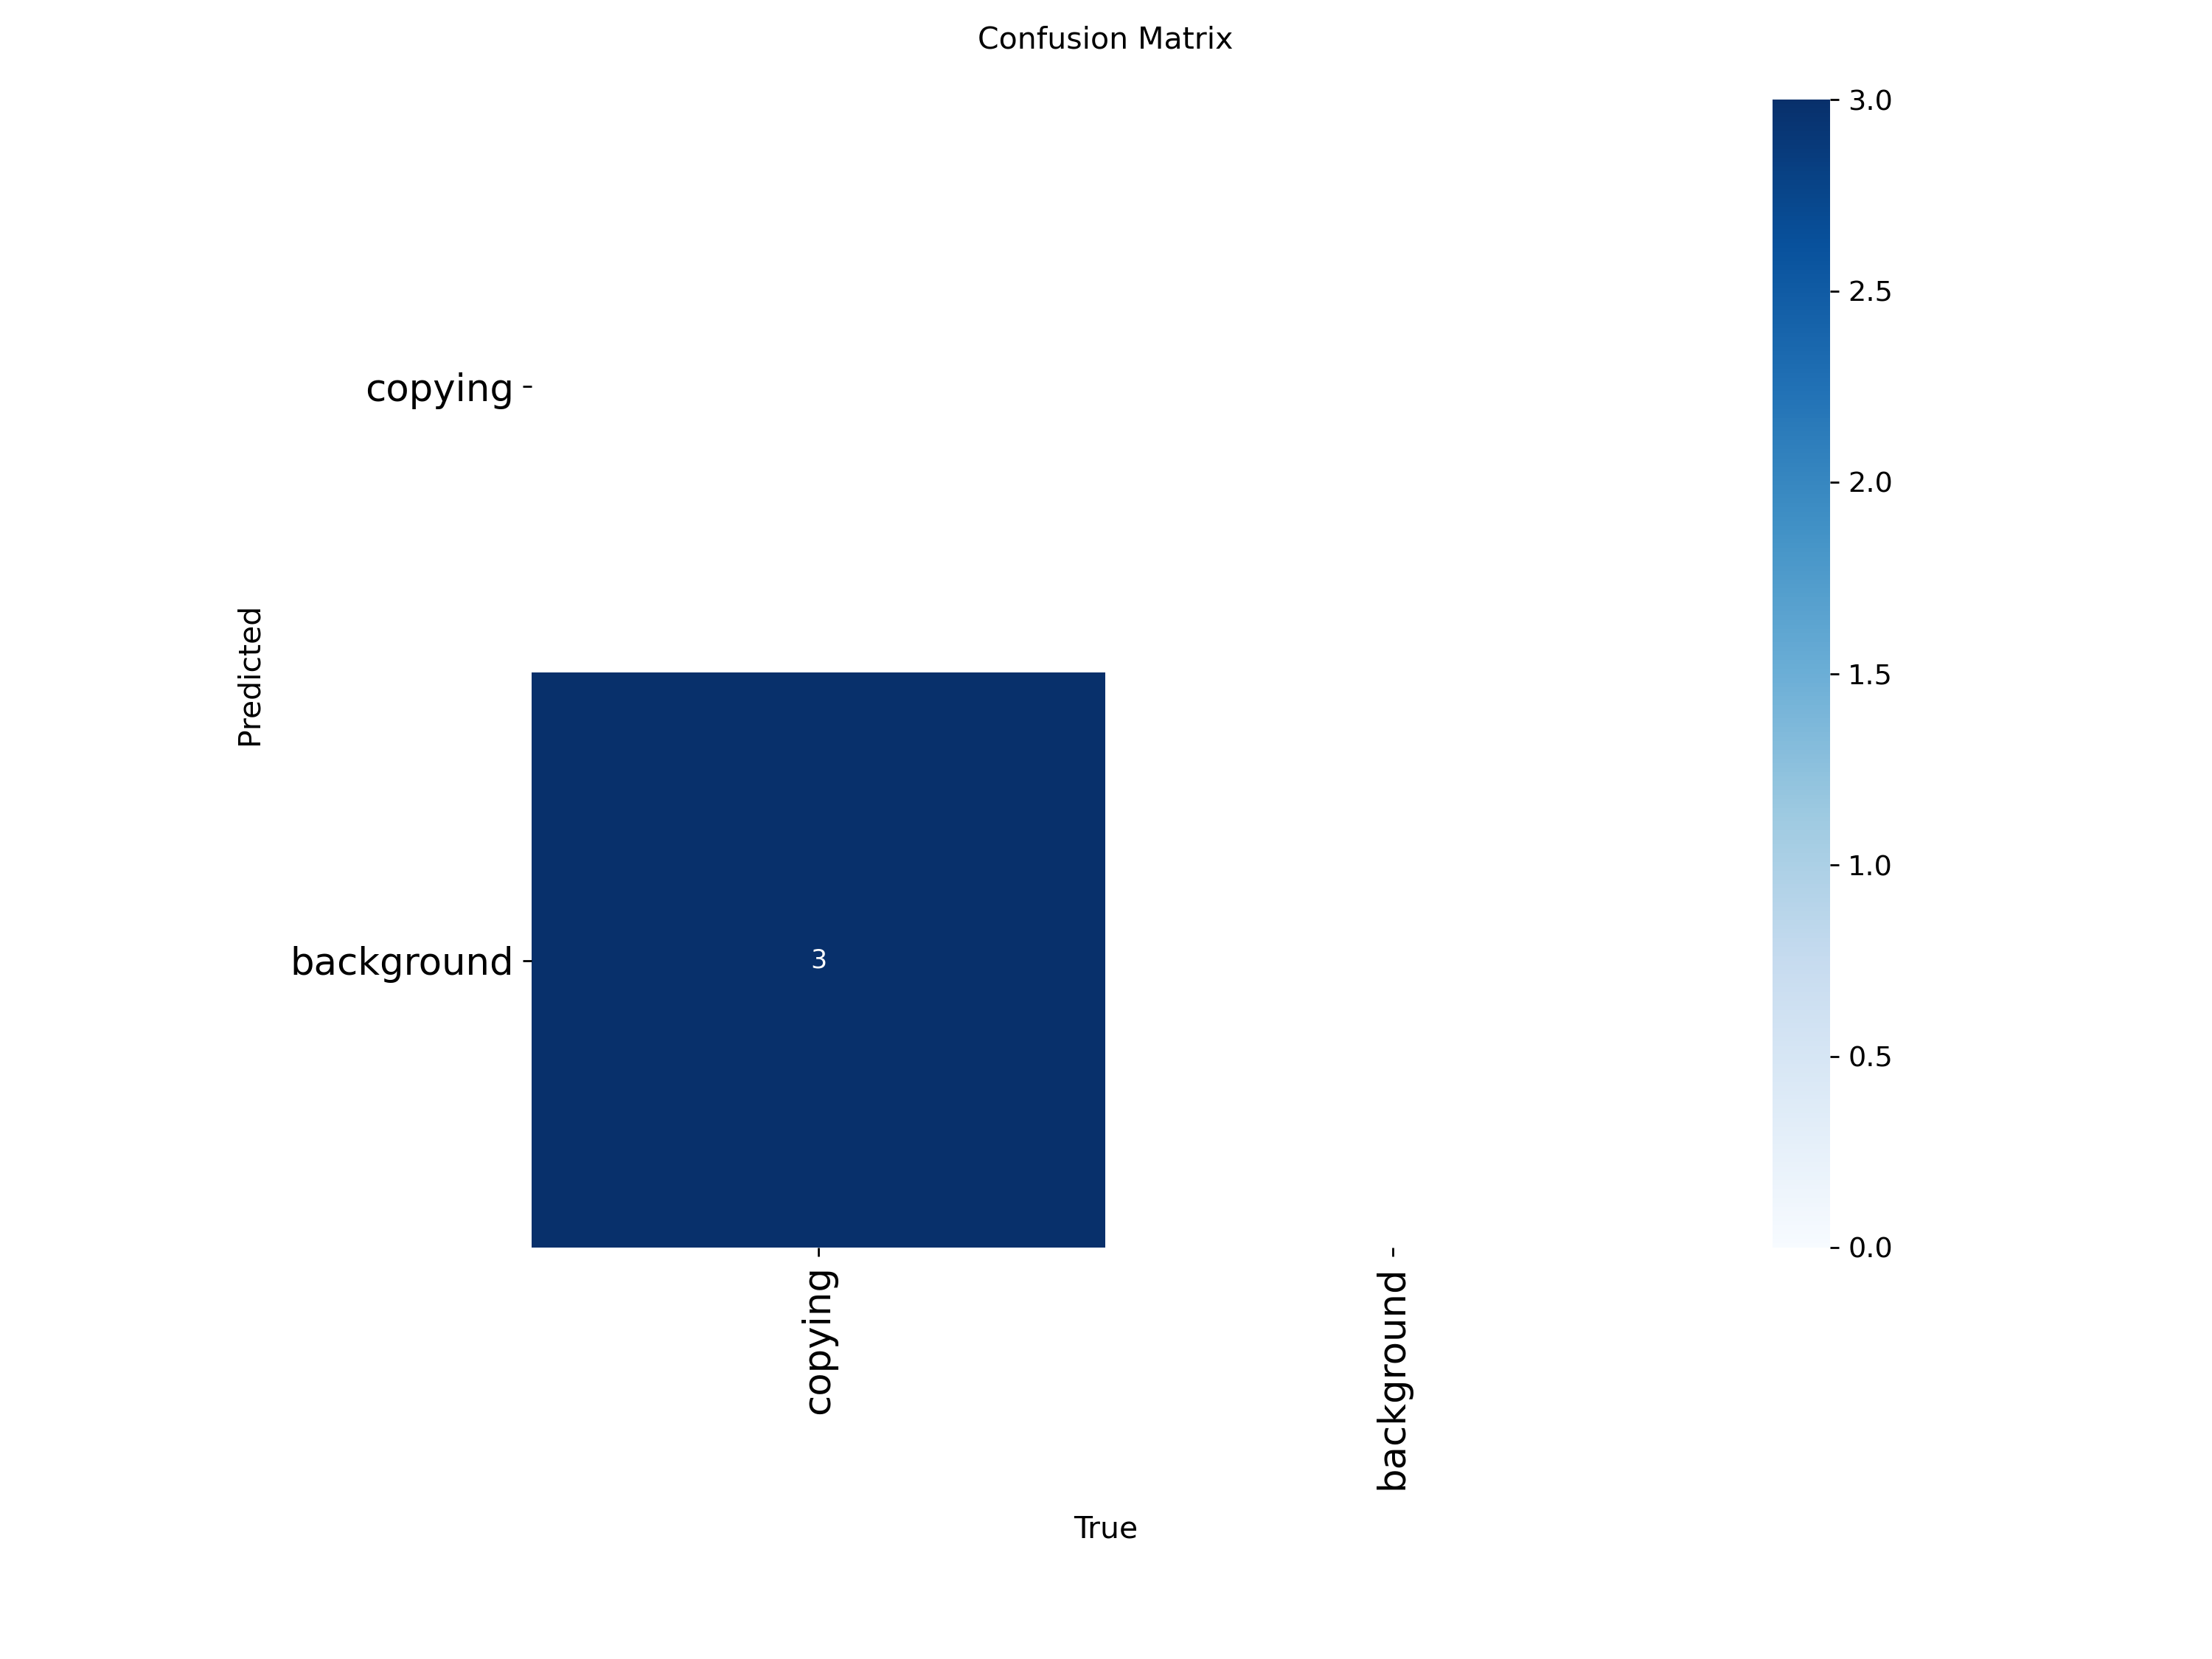

In [ ]:
Image('/content/runs/detect/train/confusion_matrix.png')

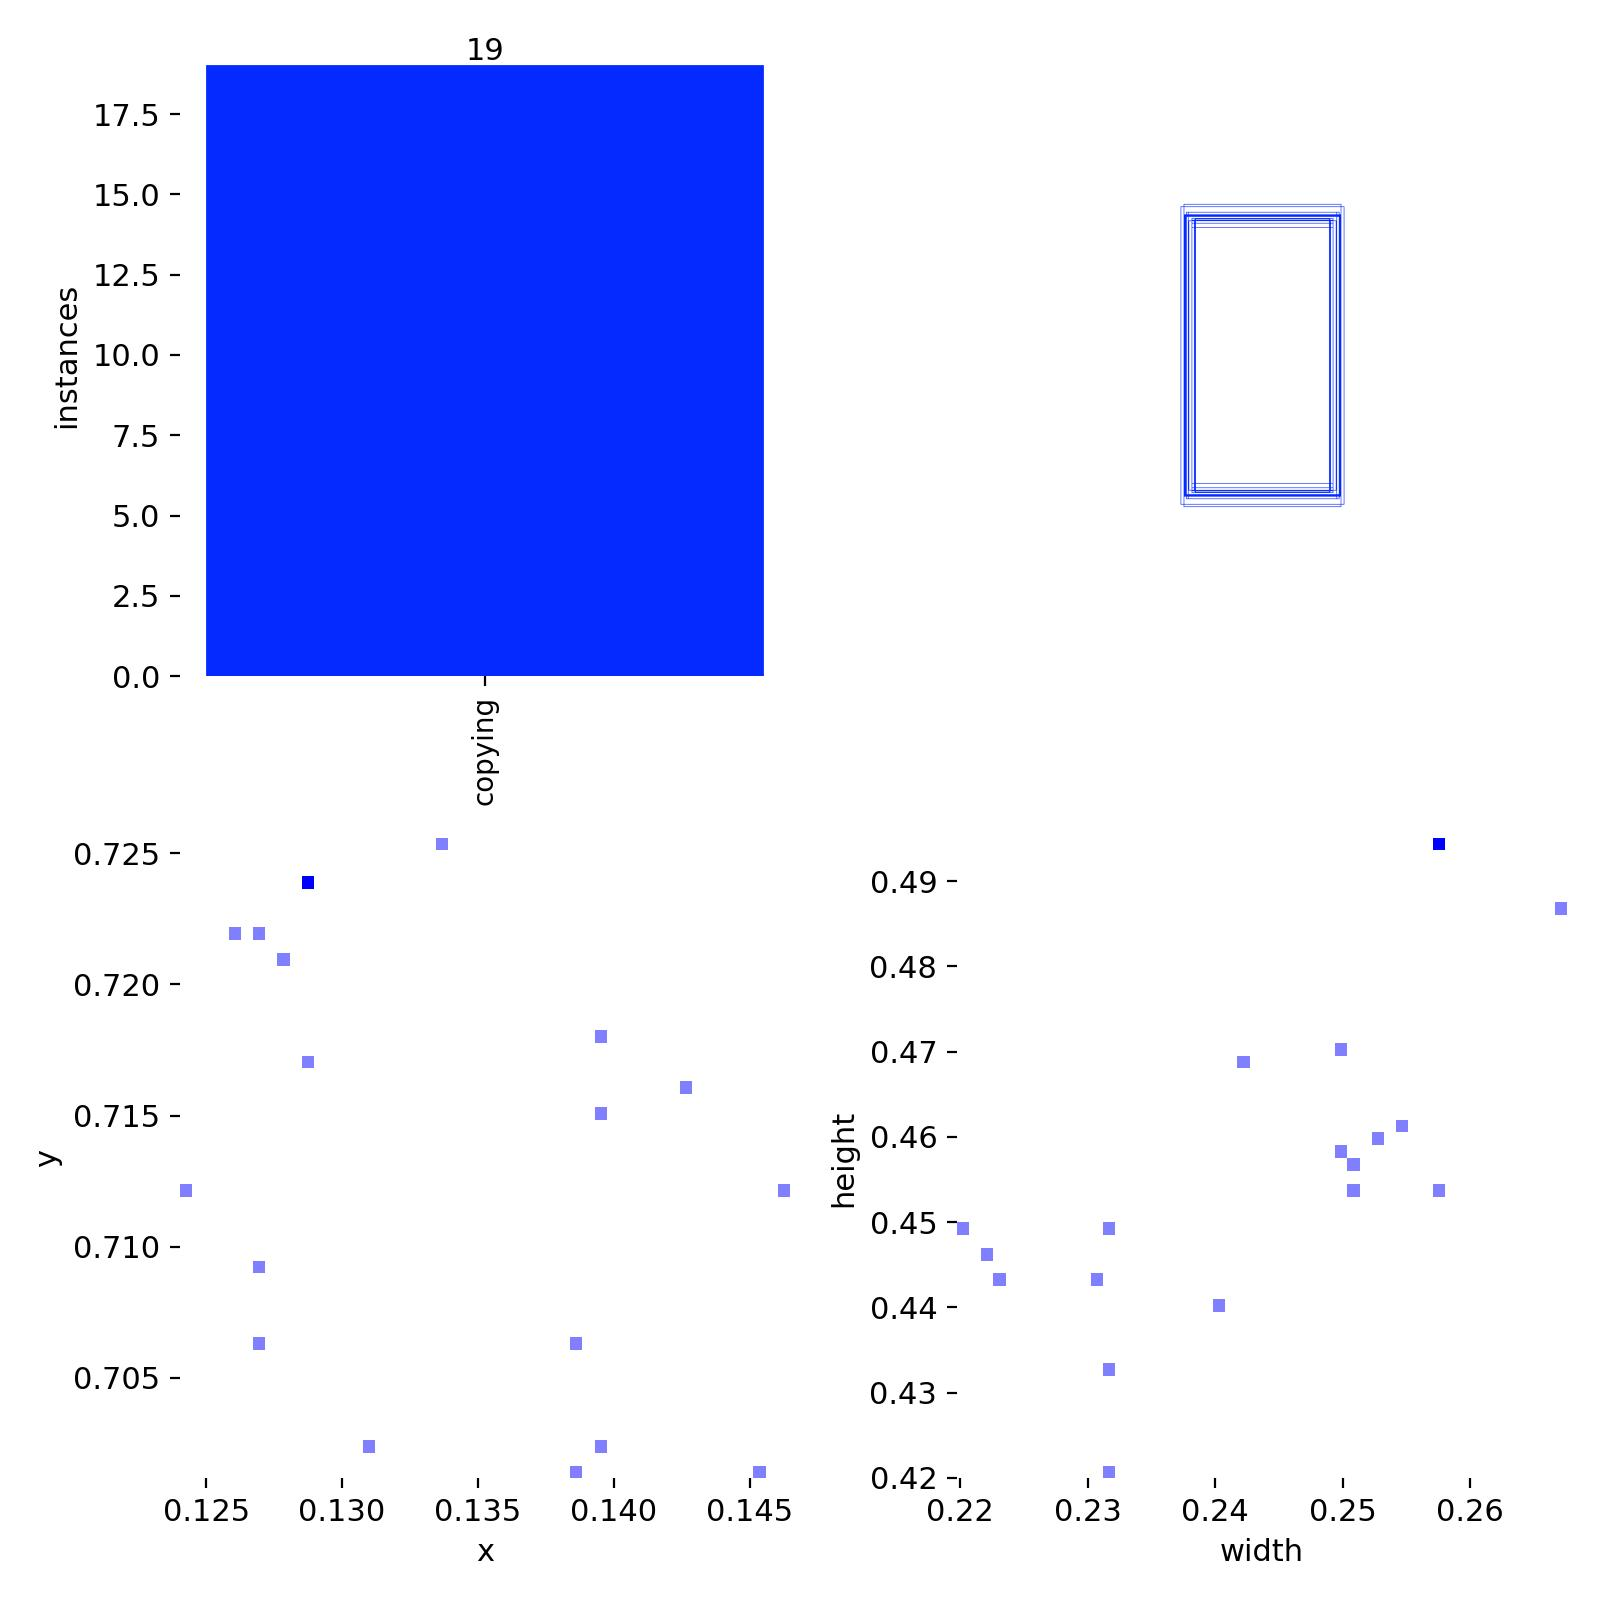

In [ ]:
Image('/content/runs/detect/train/labels.jpg')

Showing: results.png


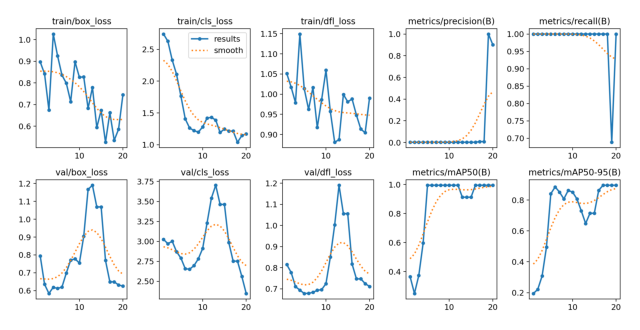

Showing: confusion_matrix.png


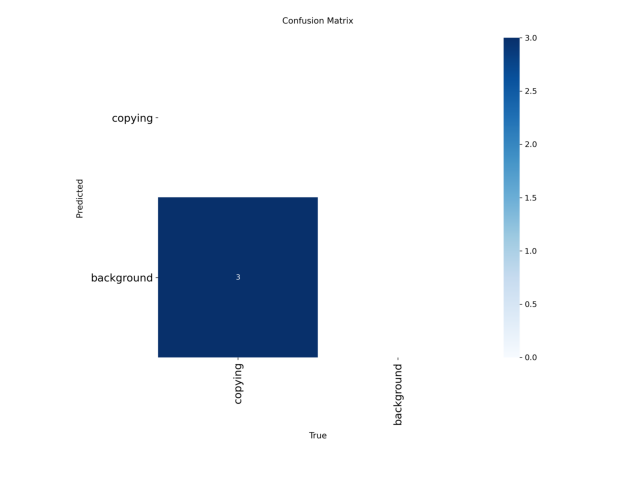

Showing: labels.jpg


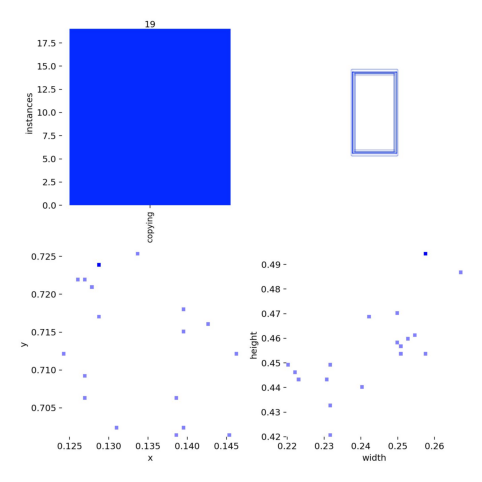

Showing: PR_curve.png
❌ Not found: /content/runs/detect/train/PR_curve.png
Showing: F1_curve.png
❌ Not found: /content/runs/detect/train/F1_curve.png


In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

base = "/content/runs/detect/train"

images = [
    "results.png",
    "confusion_matrix.png",
    "labels.jpg",
    "PR_curve.png",
    "F1_curve.png"
]

for img in images:
    path = os.path.join(base, img)
    print("Showing:", img)
    if os.path.exists(path):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        print("❌ Not found:", path)


In [ ]:
from google.colab import files
import os

file_path = '/content/runs/detect/train/weights/best.pt'

if os.path.exists(file_path):
    print(f"File '{file_path}' found. Attempting to download...")
    files.download(file_path)
else:
    print(f"Error: File '{file_path}' not found.")
    # Optionally, list the contents of the directory for debugging
    weights_dir = os.path.dirname(file_path)
    if os.path.exists(weights_dir):
        print(f"Contents of '{weights_dir}':")
        for item in os.listdir(weights_dir):
            print(f"- {item}")
    else:
        print(f"Error: Directory '{weights_dir}' not found.")

File '/content/runs/detect/train/weights/best.pt' found. Attempting to download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Path to the trained model weights
model_path = "/content/runs/detect/train/weights/best.pt"

# Check if the model file exists before attempting to load
import os
if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"Model loaded successfully from {model_path}")

    # Example test image path from the dataset
    # Replace with an actual path to a test image you want to predict on
    test_image_path = "/content/Student-Behavior-Detection-1/test/images/frame_150_jpg.rf.45f514749302df3e70377d9039e99d44.jpg"

    if os.path.exists(test_image_path):
        result = model(test_image_path)
        print("Prediction results:", result)
    else:
        print(f"Error: Test image '{test_image_path}' not found.")
        print("Please provide a valid path to an image for prediction.")
else:
    print(f"Error: Trained model '{model_path}' not found.")
    print("Please ensure the training process completed successfully and saved the model weights.")


Model loaded successfully from /content/runs/detect/train/weights/best.pt

image 1/1 /content/Student-Behavior-Detection-1/test/images/frame_150_jpg.rf.45f514749302df3e70377d9039e99d44.jpg: 512x512 (no detections), 235.2ms
Speed: 6.6ms preprocess, 235.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)
Prediction results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'copying'}
obb: None
orig_img: array([[[ 64,  69,  68],
        [ 63,  68,  67],
        [ 62,  67,  66],
        ...,
        [ 83,  84,  75],
        [ 83,  84,  75],
        [ 84,  85,  76]],

       [[ 59,  64,  63],
        [ 58,  63,  62],
        [ 58,  63,  62],
        ...,
        [ 84,  85,  76],
        [ 85,  86,  77],
        [ 85,  86,  77]],

       [[ 56,  61,  60],
        [ 55,  60,  59],
        [ 55,  60,  59],
        ...,
        [ 85,  86,  77],
        [ 86,  87,  78],
        [ 87,